### Model Training

This notebook is dedicated to training XGBClassifier machine learning models to predict `late_delivery_risk`. The primary objectives of this notebook are:

- **Model Training**: Building and training the Logistic Regression model.
- **Hyperparameter Tuning**: Optimizing model parameters to achieve the best possible performance.
- **Performance Evaluation**: Assessing the model using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.
- **Cross-Validation**: Evaluating the model's robustness and generalization using k-fold cross-validation.

By the end of this notebook, we will have:

- A trained and evaluated model for predicting `late_delivery_risk`.
- Insights into the most impactful features contributing to the predictions.

**Note**:

- Some cells are commented out due to their time-consuming nature. Results from these cells are provided as images for reference.
- Feature selection is based on the correlation coefficient with the target variable. For more details, refer to the correlation matrix in the `data_cleaning.ipynb` notebook.
- For an overview of the dataset and exploratory data analysis, refer to the `eda.ipynb` notebook.

**🚨 Check the `README.me` before continuing with this notebook**

In [1]:
# Standard libraries
import pandas as pd
import numpy as np

# Enable auto-reload for modules during development
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

# Set display options for Pandas to show all columns
pd.set_option('display.max_columns', None)

# sklearn modules
from xgboost import XGBClassifier

from scripts import data_check as ch
from scripts import models_training as cm

In [2]:
# Load the dataset (check data_cleaning.ipynb for details in the data cleaning process)
path = "../../data/df_ml.csv"
data = pd.read_csv(path)
dataframe = data.copy()

In [3]:
# Lets recheck the dataframe
dataframe.head()

,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,late_delivery_risk,customer_zipcode,latitude,longitude,order_item_discount,order_item_discount_rate,order_item_profit_ratio,order_item_quantity,product_price,year_order,hour_order,day_order,month_order,day_of_week_order,type_cash,type_debit,type_payment,type_transfer,customer_country_ee._uu.,customer_country_puerto_rico,customer_segment_consumer,customer_segment_corporate,customer_segment_home_office,department_name_apparel,department_name_book_shop,department_name_discs_shop,department_name_fan_shop,department_name_fitness,department_name_footwear,department_name_golf,department_name_health_and_beauty_,department_name_outdoors,department_name_pet_shop,department_name_technology,market_africa,market_europe,market_latam,market_pacific_asia,market_usca,shipping_mode_first_class,shipping_mode_same_day,shipping_mode_second_class,shipping_mode_standard_class
0,4,88.790001,239.979996,0,28601,35.776661,-81.362625,60.0,0.20,0.37,1,299.980011,2015,0,1,1,4,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,4,36.470001,107.889999,0,60625,41.832722,-87.980484,22.1,0.17,0.34,1,129.990005,2015,0,1,1,4,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,4,91.180000,193.990005,0,60625,41.832722,-87.980484,6.0,0.03,0.47,1,199.990005,2015,0,1,1,4,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,4,68.250000,227.500000,0,60625,41.832722,-87.980484,22.5,0.09,0.30,5,50.000000,2015,0,1,1,4,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4,4,4.100000,40.980000,1,78240,29.520010,-98.637413,9.0,0.18,0.10,2,24.990000,2015,1,1,1,4,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


# ExtraTreesClassifier

In [4]:
model_to_test = XGBClassifier

## Base Model

In [5]:
# Selecting features 
correlated_columns = cm.selecting_features(dataframe, 'late_delivery_risk', corr_coef=0.00001)

Features with correlation coefficient with target > than 1e-05
Columns that will be used for the training:
 ['shipping_mode_first_class', 'shipping_mode_second_class', 'hour_order', 'type_debit', 'type_payment', 'type_cash', 'market_europe', 'department_name_pet_shop', 'department_name_outdoors', 'customer_zipcode', 'month_order', 'market_pacific_asia', 'customer_segment_home_office', 'department_name_fitness', 'department_name_book_shop', 'day_of_week_order', 'customer_country_ee._uu.', 'department_name_health_and_beauty_', 'latitude', 'order_item_discount_rate', 'department_name_technology', 'order_item_quantity', 'market_usca', 'customer_segment_consumer', 'department_name_golf', 'department_name_footwear', 'order_item_discount', 'department_name_discs_shop', 'department_name_fan_shop', 'department_name_apparel', 'customer_country_puerto_rico', 'market_africa', 'customer_segment_corporate', 'longitude', 'day_order', 'year_order', 'product_price', 'order_item_profit_ratio', 'benefit_

In [6]:
# Splitting the data
X_train, X_test, y_train, y_test = cm.select_training_set(dataframe, 'late_delivery_risk', correlated_columns, test_size=0.2)

Test size 20%:
Training set size: 144412 | Test set size: 36104


In [7]:
# Train the model 
results_list, model_tree = cm.train_model(X_train, X_test, y_train, y_test, model_name = model_to_test)

XGBClassifier initialized with 100 estimators.
Model Metrics: | Accuracy = 0.7374 | Precision = 0.8353 | Recall = 0.6492 | F1-score = 0.7306 |
Confusion Matrix: 
[[13763  2535]
 [ 6947 12859]]

The model is moderately good but could be improved.



In [8]:
# Evaluating different test_size and features
results_df = cm.evaluate_different_correlations(dataframe, 'late_delivery_risk', model = model_to_test)

Features with correlation coefficient with target > than 1e-05
Columns that will be used for the training:
 ['shipping_mode_first_class', 'shipping_mode_second_class', 'hour_order', 'type_debit', 'type_payment', 'type_cash', 'market_europe', 'department_name_pet_shop', 'department_name_outdoors', 'customer_zipcode', 'month_order', 'market_pacific_asia', 'customer_segment_home_office', 'department_name_fitness', 'department_name_book_shop', 'day_of_week_order', 'customer_country_ee._uu.', 'department_name_health_and_beauty_', 'latitude', 'order_item_discount_rate', 'department_name_technology', 'order_item_quantity', 'market_usca', 'customer_segment_consumer', 'department_name_golf', 'department_name_footwear', 'order_item_discount', 'department_name_discs_shop', 'department_name_fan_shop', 'department_name_apparel', 'customer_country_puerto_rico', 'market_africa', 'customer_segment_corporate', 'longitude', 'day_order', 'year_order', 'product_price', 'order_item_profit_ratio', 'benefit_

In [9]:
# A resume of metrics for test_size and features
results_df.head(55)

,Correlation Coefficient ≥,Test Size (%),Accuracy,Precision,Recall,F1-score
0,0.00001,0.3,0.736109,0.831832,0.651604,0.730770
1,0.00001,0.2,0.737370,0.835325,0.649248,0.730625
2,0.00001,0.1,0.738533,0.830364,0.653791,0.731574
3,0.01000,0.3,0.717348,0.859223,0.580917,0.693179
4,0.01000,0.2,0.717012,0.856495,0.581591,0.692768
5,0.01000,0.1,0.717594,0.851319,0.583757,0.692595
6,0.02000,0.3,0.717348,0.859223,0.580917,0.693179
7,0.02000,0.2,0.717012,0.856495,0.581591,0.692768
8,0.02000,0.1,0.717594,0.851319,0.583757,0.692595
9,0.03000,0.3,0.717348,0.859223,0.580917,0.693179


According to these results, increasing the correlation coefficient threshold for feature selection does not improve the model's accuracy. This indicates that the additional features filtered out by higher thresholds do not contribute significantly to the predictive performance of the model.

In [10]:
# Cross validation
results, average = cm.cross_validate_model(dataframe, correlated_columns, 'late_delivery_risk', model = model_to_test)
results

Cross-Validation Results:
Number of folds: 5
Average Training Accuracy:  0.7712
Average Test Accuracy:  0.7375
The model performs moderately well, but there's room for improvement in its generalization.



,Fold,Train Accuracy,Test Accuracy,Train F1,Test F1
0,1,0.7733,0.7367,0.7729,0.7360
1,2,0.7686,0.7343,0.7681,0.7333
2,3,0.7753,0.7371,0.7749,0.7364
3,4,0.7700,0.7388,0.7696,0.7379
4,5,0.7689,0.7408,0.7683,0.7403


In [21]:
#Best parameters for ExtraTreesClassifier
best_parameters = {'max_depth': 30, 'n_estimators': 100, 'learning_rate': 0.2, 'gamma': 0, 'subsample': 1, 'colsample_bytree': 1}
best_correlation = 0.00001
best_test_size = 0.2
final_model = model_to_test(**best_parameters)

correlated_columns = cm.selecting_features(dataframe, 'late_delivery_risk', corr_coef=best_correlation)
X_train, X_test, y_train, y_test = cm.select_training_set(dataframe, 'late_delivery_risk', correlated_columns, test_size=best_test_size)
results_list, final_model = cm.train_model(X_train, X_test, y_train, y_test, model_name=model_to_test, model_tree=final_model)

Features with correlation coefficient with target > than 1e-05
Columns that will be used for the training:
 ['shipping_mode_first_class', 'shipping_mode_second_class', 'hour_order', 'type_debit', 'type_payment', 'type_cash', 'market_europe', 'department_name_pet_shop', 'department_name_outdoors', 'customer_zipcode', 'month_order', 'market_pacific_asia', 'customer_segment_home_office', 'department_name_fitness', 'department_name_book_shop', 'day_of_week_order', 'customer_country_ee._uu.', 'department_name_health_and_beauty_', 'latitude', 'order_item_discount_rate', 'department_name_technology', 'order_item_quantity', 'market_usca', 'customer_segment_consumer', 'department_name_golf', 'department_name_footwear', 'order_item_discount', 'department_name_discs_shop', 'department_name_fan_shop', 'department_name_apparel', 'customer_country_puerto_rico', 'market_africa', 'customer_segment_corporate', 'longitude', 'day_order', 'year_order', 'product_price', 'order_item_profit_ratio', 'benefit_

In [22]:
# Cross validation
results, average = cm.cross_validate_model(dataframe, correlated_columns, 'late_delivery_risk', model = final_model, trained_model = True)
results

Cross-Validation Results:
Number of folds: 5
Average Training Accuracy:  1.0
Average Test Accuracy:  0.9023
The model performs well on unseen data, demonstrating high accuracy.



,Fold,Train Accuracy,Test Accuracy,Train F1,Test F1
0,1,1.0,0.9036,1.0,0.9037
1,2,1.0,0.8992,1.0,0.8994
2,3,1.0,0.9051,1.0,0.9053
3,4,1.0,0.9002,1.0,0.9003
4,5,1.0,0.9035,1.0,0.9037


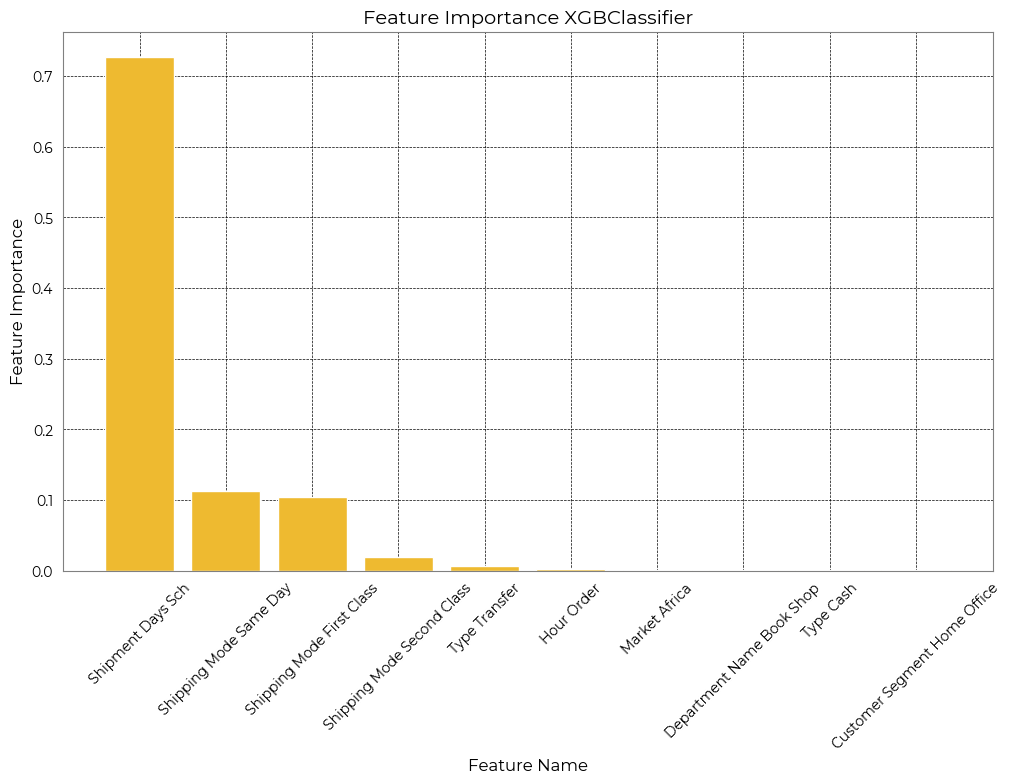

,Feature,Importance
43,days_for_shipment_scheduled,0.726616
41,shipping_mode_same_day,0.112269
0,shipping_mode_first_class,0.104064
1,shipping_mode_second_class,0.018862
42,type_transfer,0.006781
2,hour_order,0.001608
31,market_africa,0.001372
14,department_name_book_shop,0.001205
5,type_cash,0.001184
12,customer_segment_home_office,0.001137


In [15]:
# Get feature importance scores
importance_df = cm.feature_score(final_model, X_train)
importance_df

In [19]:
#Best correlated_columns for RandomForestClassifier
best_parameters = {'max_depth': 30, 'n_estimators': 100, 'learning_rate': 0.2, 'gamma': 0, 'subsample': 1, 'colsample_bytree': 1}
best_test_size = 0.2
final_model = model_to_test(**best_parameters)

correlated_columns = ['days_for_shipment_scheduled', 'shipping_mode_same_day', 'shipping_mode_first_class', 'shipping_mode_second_class', 
                      'type_transfer'
       ]
X_train, X_test, y_train, y_test = cm.select_training_set(dataframe, 'late_delivery_risk', correlated_columns, test_size=best_test_size)
results_list, final_model = cm.train_model(X_train, X_test, y_train, y_test, model_name=model_to_test, model_tree=final_model)

Test size 20%:
Training set size: 144412 | Test set size: 36104
Model Metrics: | Accuracy = 0.6937 | Precision = 0.8489 | Recall = 0.5374 | F1-score = 0.6582 |
Confusion Matrix: 
[[14403  1895]
 [ 9162 10644]]

The model is moderately good but could be improved.



In [20]:
# Cross validation
results, average = cm.cross_validate_model(dataframe, correlated_columns, 'late_delivery_risk', model = final_model, trained_model = True)
results

Cross-Validation Results:
Number of folds: 5
Average Training Accuracy:  0.6953
Average Test Accuracy:  0.6953
The model performs moderately well, but there's room for improvement in its generalization.



,Fold,Train Accuracy,Test Accuracy,Train F1,Test F1
0,1,0.6957,0.6937,0.6894,0.6873
1,2,0.6960,0.6925,0.6898,0.6858
2,3,0.6958,0.6932,0.6895,0.6871
3,4,0.6944,0.6988,0.6881,0.6925
4,5,0.6946,0.6981,0.6881,0.6924


### Results

The ExtraTreesClassifier model achieved the following performance metrics:

- **Cross-Validation Results**:
    - Average Train Accuracy: **100%**
    - Average Test Accuracy: **90.23%**

- **Model Performance**:
    - Best Accuracy: **90.11%**
    - Features: `days_for_shipment_scheduled`, `shipping_mode_same_day`, `shipping_mode_first_class`, `shipping_mode_second_class`, 
                      `type_transfer` 
    - Best Test Size: **20%**
    - Best Parameters: 
        - `max_depth`: 30
        - `learning_rate`: 0.2 
        - `gamma': 0, 'subsample`: 1 
        - `colsample_bytree`: 1
        - `n_estimators`: 100

- **Confusion Matrix**:
    The confusion matrix for the best model is as follows:
    ```
    [[14953  1345]
    [ 2226 17580]]
    ```
    - True Positives: 17580
    - True Negatives: 14953
    - False Positives: 1345
    - False Negatives: 2226

- **Evaluation Metrics**:
    - Precision: **92.89%**
    - Recall: **88.76%**
    - F1-Score: **90.78%**
 
- **Comments on Results**:

The model demonstrates good performance with high precision and a balanced F1-score.

Overall, the model performs well in predicting `late_delivery_risk`, but further efforts to improve generalization, such as fine-tuning hyperparameters, could enhance its performance on unseen data.

## Features transformation

### PCA

In [23]:
# Selecting features 
correlated_columns_pca = cm.selecting_features(dataframe, 'late_delivery_risk', corr_coef=0.00001)

Features with correlation coefficient with target > than 1e-05
Columns that will be used for the training:
 ['shipping_mode_first_class', 'shipping_mode_second_class', 'hour_order', 'type_debit', 'type_payment', 'type_cash', 'market_europe', 'department_name_pet_shop', 'department_name_outdoors', 'customer_zipcode', 'month_order', 'market_pacific_asia', 'customer_segment_home_office', 'department_name_fitness', 'department_name_book_shop', 'day_of_week_order', 'customer_country_ee._uu.', 'department_name_health_and_beauty_', 'latitude', 'order_item_discount_rate', 'department_name_technology', 'order_item_quantity', 'market_usca', 'customer_segment_consumer', 'department_name_golf', 'department_name_footwear', 'order_item_discount', 'department_name_discs_shop', 'department_name_fan_shop', 'department_name_apparel', 'customer_country_puerto_rico', 'market_africa', 'customer_segment_corporate', 'longitude', 'day_order', 'year_order', 'product_price', 'order_item_profit_ratio', 'benefit_

In [24]:
# Splitting the data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = cm.select_training_set(dataframe, 'late_delivery_risk', correlated_columns_pca, test_size=0.2, transform = True, transform_type = 'pca')

Applying transformation: pca...
Test size 20%:
Training set size: 144412 | Test set size: 36104


In [25]:
# Train the model
results_list, model_tree_pca = cm.train_model(X_train_pca, X_test_pca, y_train_pca, y_test_pca, model_name = model_to_test)

XGBClassifier initialized with 100 estimators.
Model Metrics: | Accuracy = 0.5497 | Precision = 0.551 | Recall = 0.9677 | F1-score = 0.7022 |
Confusion Matrix: 
[[  680 15618]
 [  640 19166]]

The model performs poorly. Consider feature selection or hyperparameter tuning.



#### PCA Transformation Results

The PCA transformation did not enhance the model's performance. Despite reducing dimensionality, the accuracy and other evaluation metrics did not improve respect to original feature set. This suggests that the selected features already capture the most relevant information for predicting `late_delivery_risk`, and further dimensionality reduction through PCA was not beneficial in this case.

### MinMax

In [26]:
# Selecting features 
correlated_columns_mm = cm.selecting_features(dataframe, 'late_delivery_risk', corr_coef=0.04)

Features with correlation coefficient with target > than 0.04
Columns that will be used for the training:
 ['shipping_mode_first_class', 'shipping_mode_second_class', 'hour_order', 'shipping_mode_same_day', 'type_transfer', 'days_for_shipment_scheduled', 'shipping_mode_standard_class'] 



In [27]:
# Splitting the data
X_train_mm, X_test_mm, y_train_mm, y_test_mm = cm.select_training_set(dataframe, 'late_delivery_risk', correlated_columns_mm, test_size=0.2, transform = True, transform_type = 'minmax')

Applying transformation: minmax...
Test size 20%:
Training set size: 144412 | Test set size: 36104


In [28]:
# Train the model
results_list, model_tree_mm = cm.train_model(X_train_mm, X_test_mm, y_train_mm, y_test_mm, model_name = model_to_test)

XGBClassifier initialized with 100 estimators.
Model Metrics: | Accuracy = 0.717 | Precision = 0.8565 | Recall = 0.5816 | F1-score = 0.6928 |
Confusion Matrix: 
[[14368  1930]
 [ 8287 11519]]

The model is moderately good but could be improved.



#### MinMax Transformation Results

The MinMax transformation did not enhance the model's performance compared to the original feature set. Despite normalizing the data to a specific range, the accuracy and other evaluation metrics remained consistent with the results obtained using the untransformed features. This suggests that the original features already provide sufficient information for predicting `late_delivery_risk`, and further normalization through MinMax scaling was not beneficial in this case.

### Transformation Results

The results obtained after applying transformations such as PCA and MinMax scaling did not significantly improve the model's performance compared to the original feature set. This indicates that the selected features already capture the most relevant information for predicting `late_delivery_risk`, and further transformations were not beneficial in this case.

## Model Evaluation

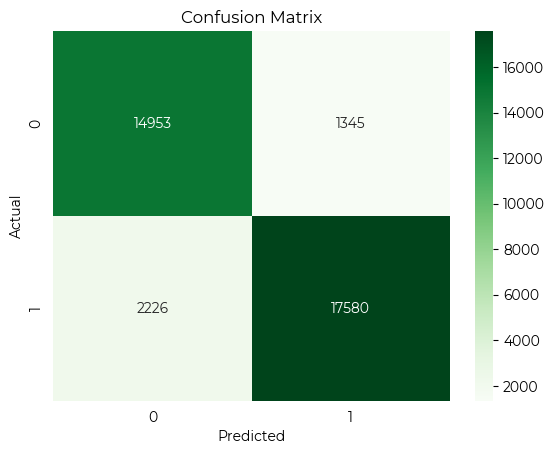

In [29]:
# Confusion Matrix
cm.confusion_matrix_plot(final_model, X_test, y_test, correlated_columns)

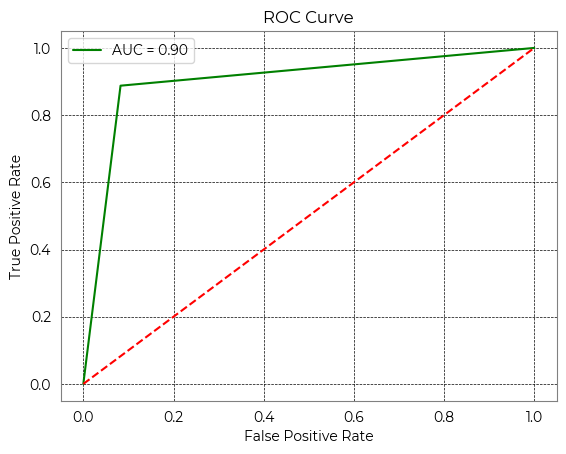

In [30]:
# ROC Curve
cm.roc_curve_plot(final_model, X_test, y_test, correlated_columns)